In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
file_path = r"C:\Users\mdmai\Downloads\test.csv"

df = pd.read_csv(file_path)
df.head()

,Price,Brand,Processor Brand,Processor Model,Generation,Processor Base Frequency,Processor Max Frequency,Processor Core,Processor Thread,RAM,RAM Type,Storage Capacity,Display Size,Graphics Memory
0,70400,4,1,1,11,2.4,4.2,4.0,1,1,1,8,14.0,1
1,129800,5,1,2,11,2.3,4.6,1.0,2,1,1,8,15.6,4
2,29950,11,1,7,12,1.1,2.8,2.0,2,4,3,6,14.0,1
3,32010,9,1,7,10,1.9,1.9,2.0,2,4,1,5,14.0,1
4,32999,6,2,10,11,3.1,3.7,2.0,2,4,1,6,14.1,1


In [3]:
df.shape

(1197, 14)

In [4]:
df.describe()


,Price,Brand,Processor Brand,Processor Model,Generation,Processor Base Frequency,Processor Max Frequency,Processor Core,Processor Thread,RAM,RAM Type,Storage Capacity,Display Size,Graphics Memory
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,123244.117794,3.380117,1.245614,3.055138,10.374269,2.508605,4.199081,3.316625,2.258981,1.856307,1.403509,6.827903,14.937928,1.644946
std,90184.205826,2.867189,0.520314,2.403029,2.304991,0.619703,0.558837,1.648705,1.424146,1.149118,0.945905,1.491489,1.077630,1.134773
min,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,67500.000000,1.000000,1.000000,1.000000,11.000000,2.300000,4.100000,2.000000,1.000000,1.000000,1.000000,7.000000,14.000000,1.000000
50%,92810.000000,2.000000,1.000000,2.000000,11.000000,2.400000,4.200000,4.000000,2.000000,1.000000,1.000000,7.000000,15.600000,1.000000
75%,152990.000000,5.000000,1.000000,4.000000,12.000000,3.000000,4.600000,4.000000,3.000000,2.000000,1.000000,8.000000,15.600000,2.000000
max,840770.000000,13.000000,5.000000,11.000000,13.000000,4.400000,5.600000,8.000000,8.000000,6.000000,6.000000,10.000000,18.400000,5.000000


In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [6]:
df_train.head()

,Price,Brand,Processor Brand,Processor Model,Generation,Processor Base Frequency,Processor Max Frequency,Processor Core,Processor Thread,RAM,RAM Type,Storage Capacity,Display Size,Graphics Memory
533,107630,1,1,1,11,2.4,4.2,4.0,1,1,1,7,15.6,2
1114,80000,1,1,1,11,2.4,4.2,2.0,1,1,1,1,14.0,1
1141,87500,9,1,2,10,1.8,4.2,4.0,1,1,1,1,15.6,1
57,63690,6,2,6,5,2.7,2.7,4.0,1,1,1,6,15.6,1
423,65970,2,1,3,11,3.0,4.1,2.0,4,1,1,7,15.6,1


In [7]:
df_train.shape

(957, 14)

In [8]:
y_train = df_train.pop('Price')
X_train = df_train

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
estimator = LinearRegression()

rfe = RFE(estimator, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

<AxesSubplot: xlabel='Brand', ylabel='count'>

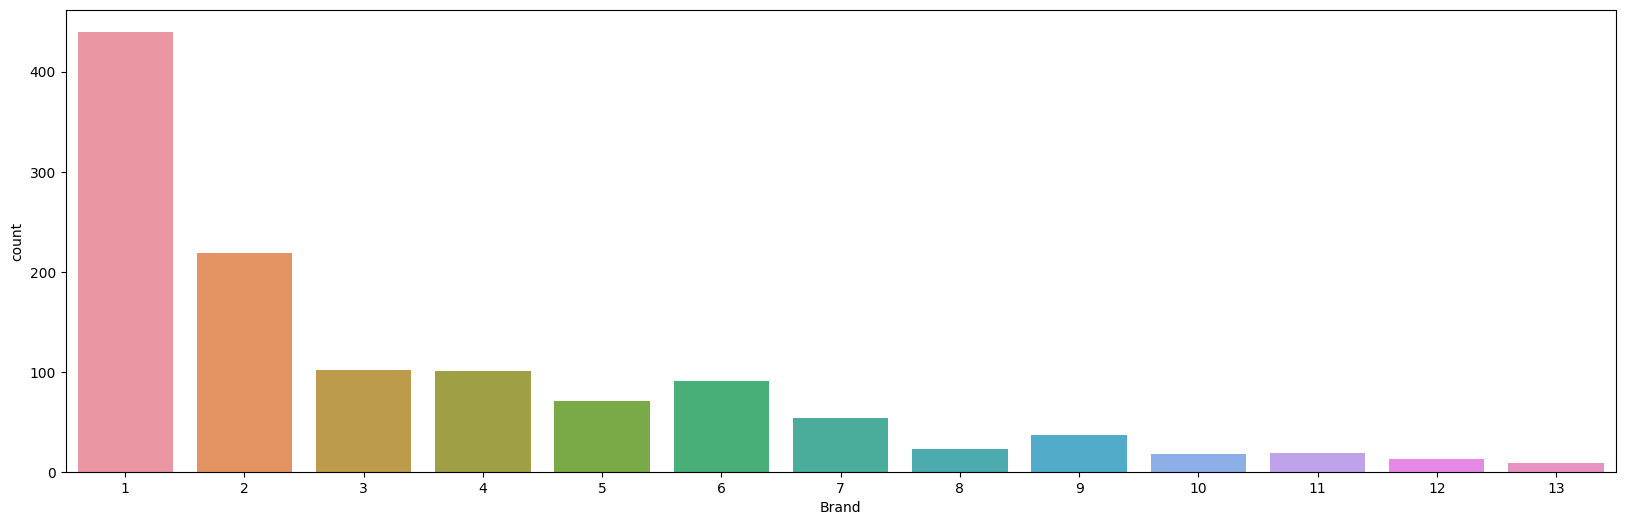

In [11]:
df['Brand'].value_counts()
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Brand", data=df, ax=ax)

In [12]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
df_test.shape

(240, 14)

In [14]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 5341212599.69
R^2 Score: 0.47


In [16]:
predicted_values = lasso.predict(X_test)

for i, (prediction, actual) in enumerate(zip(y_pred, y_test)):
   print(f" {i+1}. Predicted price: {prediction:.2f}, Actual price: {actual:.2f}")

 1. Predicted price: 159226.62, Actual price: 164000.00
 2. Predicted price: 253873.82, Actual price: 412500.00
 3. Predicted price: 83631.85, Actual price: 74327.00
 4. Predicted price: 114123.11, Actual price: 78500.00
 5. Predicted price: 111149.77, Actual price: 61050.00
 6. Predicted price: 84797.79, Actual price: 70990.00
 7. Predicted price: 153150.43, Actual price: 55000.00
 8. Predicted price: 165351.73, Actual price: 248000.00
 9. Predicted price: 99969.85, Actual price: 63260.00
 10. Predicted price: 110963.65, Actual price: 133500.00
 11. Predicted price: 132397.01, Actual price: 126950.00
 12. Predicted price: 99253.73, Actual price: 54790.00
 13. Predicted price: 87330.94, Actual price: 59460.00
 14. Predicted price: 122783.41, Actual price: 150000.00
 15. Predicted price: 157867.16, Actual price: 160080.00
 16. Predicted price: 134819.60, Actual price: 99820.00
 17. Predicted price: 61758.22, Actual price: 42500.00
 18. Predicted price: 94045.61, Actual price: 99500.00
 

In [24]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred1 = rf.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 893601363.76
R^2 Score: 0.91


In [28]:
for i, (prediction, actual) in enumerate(zip(y_pred1, y_test), start=1):
    print(f"Data Point {i}: Predicted Price: {prediction:.2f}, Actual Price: {actual:.2f}")

Data Point 1: Predicted Price: 136422.03, Actual Price: 164000.00
Data Point 2: Predicted Price: 331660.40, Actual Price: 412500.00
Data Point 3: Predicted Price: 74720.40, Actual Price: 74327.00
Data Point 4: Predicted Price: 88557.02, Actual Price: 78500.00
Data Point 5: Predicted Price: 59463.54, Actual Price: 61050.00
Data Point 6: Predicted Price: 60879.34, Actual Price: 70990.00
Data Point 7: Predicted Price: 53141.98, Actual Price: 55000.00
Data Point 8: Predicted Price: 195511.40, Actual Price: 248000.00
Data Point 9: Predicted Price: 63215.19, Actual Price: 63260.00
Data Point 10: Predicted Price: 170612.70, Actual Price: 133500.00
Data Point 11: Predicted Price: 124735.26, Actual Price: 126950.00
Data Point 12: Predicted Price: 59057.58, Actual Price: 54790.00
Data Point 13: Predicted Price: 57922.56, Actual Price: 59460.00
Data Point 14: Predicted Price: 189775.70, Actual Price: 150000.00
Data Point 15: Predicted Price: 142318.90, Actual Price: 160080.00
Data Point 16: Predi

In [27]:
from sklearn.linear_model import Ridge

In [29]:

ridge = Ridge(alpha=0.1)

ridge.fit(X_train, y_train)

y_pred2 = ridge.predict(X_test)


In [30]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 5341326121.57
R^2 Score: 0.47


In [31]:
for i, (prediction, actual) in enumerate(zip(y_pred2, y_test), start=1):
    print(f"Data Point {i}: Predicted Price: {prediction:.2f}, Actual Price: {actual:.2f}")

Data Point 1: Predicted Price: 159216.88, Actual Price: 164000.00
Data Point 2: Predicted Price: 253846.13, Actual Price: 412500.00
Data Point 3: Predicted Price: 83637.68, Actual Price: 74327.00
Data Point 4: Predicted Price: 114130.52, Actual Price: 78500.00
Data Point 5: Predicted Price: 111153.83, Actual Price: 61050.00
Data Point 6: Predicted Price: 84805.42, Actual Price: 70990.00
Data Point 7: Predicted Price: 153151.15, Actual Price: 55000.00
Data Point 8: Predicted Price: 165340.11, Actual Price: 248000.00
Data Point 9: Predicted Price: 99984.01, Actual Price: 63260.00
Data Point 10: Predicted Price: 110952.86, Actual Price: 133500.00
Data Point 11: Predicted Price: 132391.99, Actual Price: 126950.00
Data Point 12: Predicted Price: 99266.93, Actual Price: 54790.00
Data Point 13: Predicted Price: 87336.89, Actual Price: 59460.00
Data Point 14: Predicted Price: 122771.58, Actual Price: 150000.00
Data Point 15: Predicted Price: 157880.77, Actual Price: 160080.00
Data Point 16: Pr

In [32]:
from sklearn.svm import SVR

In [34]:
svr = SVR(kernel='rbf')

svr.fit(X_train, y_train)
y_pred3 = svr.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 11695749552.70
R^2 Score: -0.16


In [36]:
for i, (prediction, actual) in enumerate(zip(y_pred3, y_test), start=1):
    print(f"Data Point {i}: Predicted Price: {prediction:.2f}, Actual Price: {actual:.2f}")

Data Point 1: Predicted Price: 91688.28, Actual Price: 164000.00
Data Point 2: Predicted Price: 91677.98, Actual Price: 412500.00
Data Point 3: Predicted Price: 91673.06, Actual Price: 74327.00
Data Point 4: Predicted Price: 91692.64, Actual Price: 78500.00
Data Point 5: Predicted Price: 91675.25, Actual Price: 61050.00
Data Point 6: Predicted Price: 91673.57, Actual Price: 70990.00
Data Point 7: Predicted Price: 91680.76, Actual Price: 55000.00
Data Point 8: Predicted Price: 91688.63, Actual Price: 248000.00
Data Point 9: Predicted Price: 91681.83, Actual Price: 63260.00
Data Point 10: Predicted Price: 91680.78, Actual Price: 133500.00
Data Point 11: Predicted Price: 91686.75, Actual Price: 126950.00
Data Point 12: Predicted Price: 91677.03, Actual Price: 54790.00
Data Point 13: Predicted Price: 91676.40, Actual Price: 59460.00
Data Point 14: Predicted Price: 91678.31, Actual Price: 150000.00
Data Point 15: Predicted Price: 91688.81, Actual Price: 160080.00
Data Point 16: Predicted Pr

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 2141569643.42
R^2 Score: 0.79


In [41]:
for i, (prediction, actual) in enumerate(zip(y_pred4, y_test), start=1):
    print(f"Data Point {i}: Predicted Price: {prediction:.2f}, Actual Price: {actual:.2f}")

Data Point 1: Predicted Price: 105500.00, Actual Price: 164000.00
Data Point 2: Predicted Price: 302000.00, Actual Price: 412500.00
Data Point 3: Predicted Price: 74735.38, Actual Price: 74327.00
Data Point 4: Predicted Price: 82140.00, Actual Price: 78500.00
Data Point 5: Predicted Price: 59860.00, Actual Price: 61050.00
Data Point 6: Predicted Price: 62470.00, Actual Price: 70990.00
Data Point 7: Predicted Price: 56420.00, Actual Price: 55000.00
Data Point 8: Predicted Price: 258000.00, Actual Price: 248000.00
Data Point 9: Predicted Price: 66000.00, Actual Price: 63260.00
Data Point 10: Predicted Price: 132000.00, Actual Price: 133500.00
Data Point 11: Predicted Price: 124800.00, Actual Price: 126950.00
Data Point 12: Predicted Price: 63000.00, Actual Price: 54790.00
Data Point 13: Predicted Price: 59460.00, Actual Price: 59460.00
Data Point 14: Predicted Price: 253000.00, Actual Price: 150000.00
Data Point 15: Predicted Price: 143810.00, Actual Price: 160080.00
Data Point 16: Predi